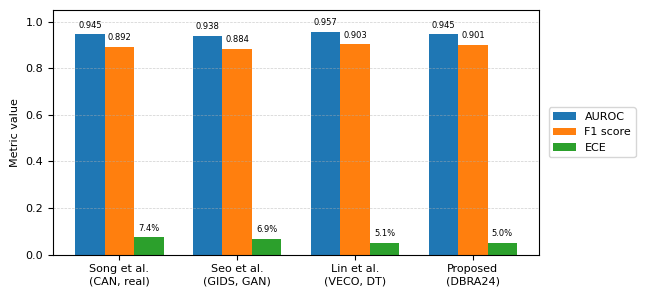

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Data
methods = [
    "Song et al.\n(CAN, real)",
    "Seo et al.\n(GIDS, GAN)",
    "Lin et al.\n(VECO, DT)",
    "Proposed\n(DBRA24)"
]

auroc = np.array([0.945, 0.938, 0.957, 0.945])
f1 = np.array([0.892, 0.884, 0.903, 0.901])
ece_pct = np.array([7.4, 6.9, 5.1, 5.0])
ece = ece_pct / 100.0  # convert to [0,1]

x = np.arange(len(methods))
width = 0.25

plt.rcParams.update({"font.size": 8})
fig, ax = plt.subplots(figsize=(6.5, 3))

# Bars
bars_auroc = ax.bar(x - width, auroc, width, label="AUROC")
bars_f1 = ax.bar(x, f1, width, label="F1 score")
bars_ece = ax.bar(x + width, ece, width, label="ECE")

# Axis formatting
ax.set_ylabel("Metric value")
ax.set_xticks(x)
ax.set_xticklabels(methods, ha="center")
ax.set_ylim(0, 1.05)
ax.grid(axis="y", linestyle="--", linewidth=0.5, alpha=0.6)

# Legend on the right side (outside plot area)
ax.legend(
    loc="center left",
    bbox_to_anchor=(1.02, 0.5),
    borderaxespad=0,
    fontsize=8
)

# Annotate bars
def annotate(bars, fmt, pct=False):
    for bar in bars:
        h = bar.get_height()
        label = fmt.format(h * 100 if pct else h)
        ax.text(
            bar.get_x() + bar.get_width()/2,
            h + 0.02,
            label,
            ha="center",
            va="bottom",
            fontsize=6
        )

annotate(bars_auroc, "{:.3f}")
annotate(bars_f1, "{:.3f}")
annotate(bars_ece, "{:.1f}%", pct=True)

plt.tight_layout()
plt.show()
# plt.savefig(out_path, dpi=300, bbox_inches="tight")
plt.close()

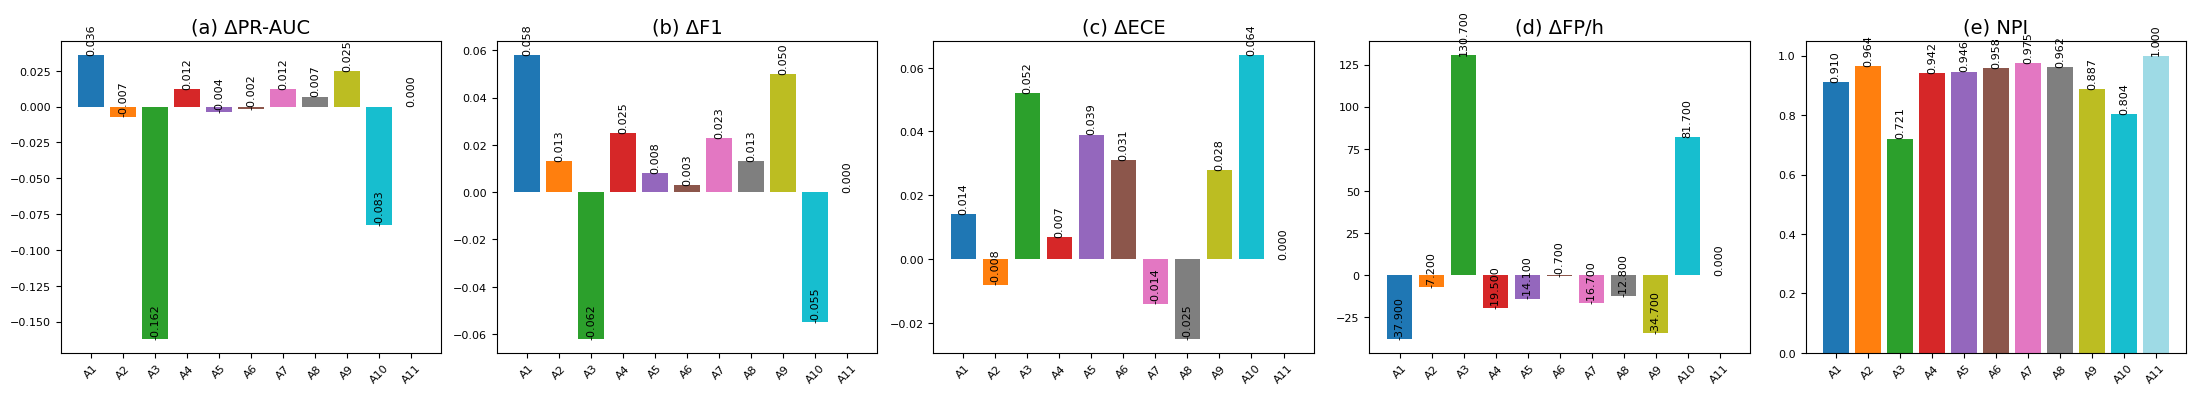

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data
models = [
    "A1","A2","A3","A4","A5","A6","A7","A8","A9","A10","A11"
]

d_pr_auc = [0.036,-0.007,-0.162,0.012,-0.004,-0.002,0.012,0.007,0.025,-0.083,0.0]
d_f1     = [0.058,0.013,-0.062,0.025,0.008,0.003,0.023,0.013,0.05,-0.055,0.0]
d_ece    = [0.014,-0.008,0.052,0.007,0.039,0.031,-0.014,-0.025,0.028,0.064,0.0]
d_fph    = [-37.9,-7.2,130.7,-19.5,-14.1,-0.7,-16.7,-12.8,-34.7,81.7,0.0]
npi      = [0.910,0.964,0.721,0.942,0.946,0.958,0.975,0.962,0.887,0.804,1.0]

metrics = {
    "(a) ΔPR-AUC": d_pr_auc,
    "(b) ΔF1": d_f1,
    "(c) ΔECE": d_ece,
    "(d) ΔFP/h": d_fph,
    "(e) NPI": npi
}

# Colors
colors = plt.cm.tab20(np.linspace(0, 1, len(models)))

fig, axes = plt.subplots(1, 5, figsize=(22, 4))

for ax, (title, values) in zip(axes, metrics.items()):
    bars = ax.bar(models, values, color=colors)
    ax.set_title(title, fontsize=14)
    ax.tick_params(axis='x', rotation=45)

    # Annotate values
    for bar, val in zip(bars, values):
        ax.text(
            bar.get_x() + bar.get_width()/2,
            bar.get_height(),
            f"{val:.3f}",
            ha='center', va='bottom',
            fontsize=8, rotation=90
        )

plt.tight_layout()
plt.show()


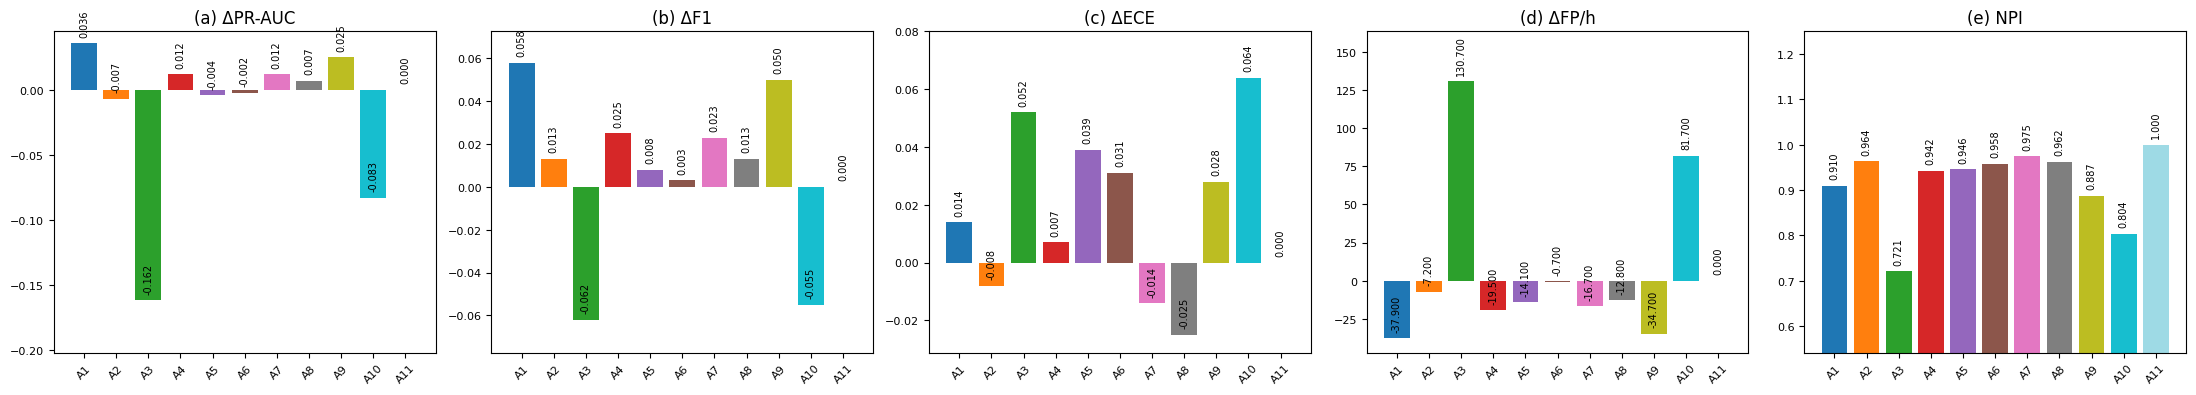

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ["A1","A2","A3","A4","A5","A6","A7","A8","A9","A10","A11"]

d_pr_auc = [0.036,-0.007,-0.162,0.012,-0.004,-0.002,0.012,0.007,0.025,-0.083,0.0]
d_f1     = [0.058,0.013,-0.062,0.025,0.008,0.003,0.023,0.013,0.05,-0.055,0.0]
d_ece    = [0.014,-0.008,0.052,0.007,0.039,0.031,-0.014,-0.025,0.028,0.064,0.0]
d_fph    = [-37.9,-7.2,130.7,-19.5,-14.1,-0.7,-16.7,-12.8,-34.7,81.7,0.0]
npi      = [0.910,0.964,0.721,0.942,0.946,0.958,0.975,0.962,0.887,0.804,1.0]

metrics = {
    "(a) ΔPR-AUC": d_pr_auc,
    "(b) ΔF1": d_f1,
    "(c) ΔECE": d_ece,
    "(d) ΔFP/h": d_fph,
    "(e) NPI": npi
}

colors = plt.cm.tab20(np.linspace(0, 1, len(models)))

fig, axes = plt.subplots(1, 5, figsize=(22, 4))

for ax, (title, values) in zip(axes, metrics.items()):
    bars = ax.bar(models, values, color=colors)
    ax.set_title(title, fontsize=12)
    ax.tick_params(axis='x', rotation=45)

    # Dynamic y-limits to prevent clipping
    ymin = min(values) - 0.25 * abs(min(values))
    ymax = max(values) + 0.25 * abs(max(values))
    ax.set_ylim([ymin, ymax])

    # Annotate values
    for bar, val in zip(bars, values):
        ax.text(
            bar.get_x() + bar.get_width()/2,
            bar.get_height() + 0.02 * (ymax - ymin),
            f"{val:.3f}",
            ha='center',
            va='bottom',
            fontsize=7,
            rotation=90
        )

plt.tight_layout()
plt.show()


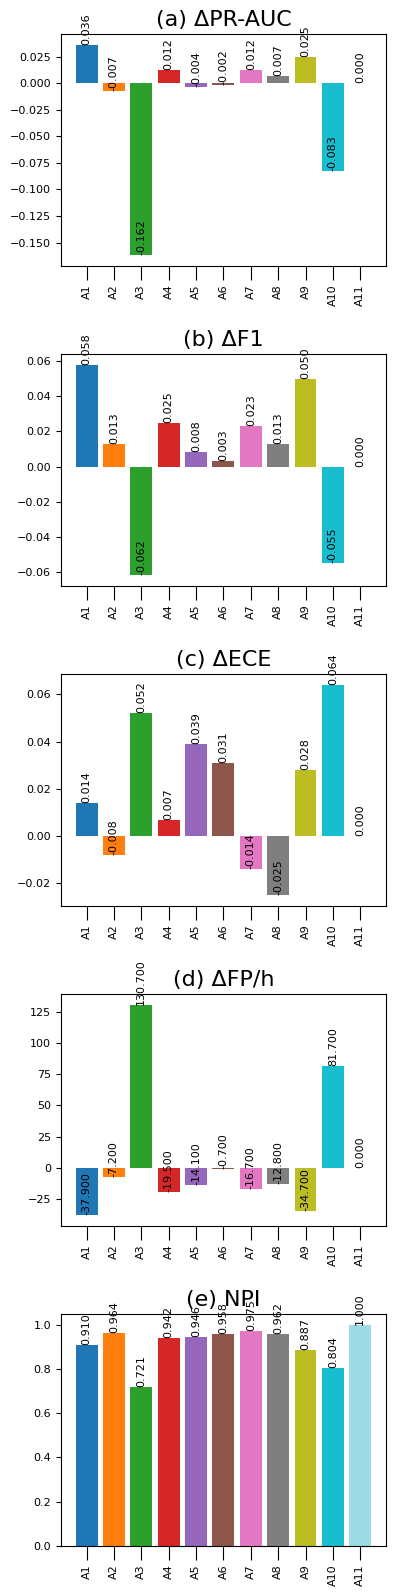

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data
models = [
    "A1","A2","A3","A4","A5","A6","A7","A8","A9","A10","A11"
]

d_pr_auc = [0.036,-0.007,-0.162,0.012,-0.004,-0.002,0.012,0.007,0.025,-0.083,0.0]
d_f1     = [0.058,0.013,-0.062,0.025,0.008,0.003,0.023,0.013,0.05,-0.055,0.0]
d_ece    = [0.014,-0.008,0.052,0.007,0.039,0.031,-0.014,-0.025,0.028,0.064,0.0]
d_fph    = [-37.9,-7.2,130.7,-19.5,-14.1,-0.7,-16.7,-12.8,-34.7,81.7,0.0]
npi      = [0.910,0.964,0.721,0.942,0.946,0.958,0.975,0.962,0.887,0.804,1.0]

metrics = {
    "(a) ΔPR-AUC": d_pr_auc,
    "(b) ΔF1": d_f1,
    "(c) ΔECE": d_ece,
    "(d) ΔFP/h": d_fph,
    "(e) NPI": npi
}

# Colors
colors = plt.cm.tab20(np.linspace(0, 1, len(models)))

fig, axes = plt.subplots(5, 1, figsize=(4, 16))

for ax, (title, values) in zip(axes, metrics.items()):
    bars = ax.bar(models, values, color=colors)
    ax.set_title(title, fontsize=16)
    ax.tick_params(axis='x', size=10, rotation=90)

    # Annotate values
    for bar, val in zip(bars, values):
        ax.text(
            bar.get_x() + bar.get_width()/2,
            bar.get_height(),
            f"{val:.3f}",
            ha='center', va='bottom',
            fontsize=8, rotation=90
        )

plt.tight_layout()
plt.show()
